<a href="https://colab.research.google.com/github/superpanditas/TrueHome/blob/main/aguas_venenosas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __*Desafio: Aguas Venenosas*__

#### Loading Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone  https://github.com/superpanditas/TrueHome.git

Cloning into 'TrueHome'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (64/64), done.


#### Loading Dataset

In [107]:
sustancias = pd.read_csv('/content/TrueHome/sustancias_diversas.csv')
veneno = pd.read_csv('/content/TrueHome/veneno.csv')

#### Analyze Data

In [108]:
sustancias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      500 non-null    int64  
 1   v1      500 non-null    float64
 2   v2      500 non-null    float64
 3   v3      500 non-null    float64
 4   v4      500 non-null    float64
 5   v5      500 non-null    float64
 6   v6      500 non-null    float64
 7   v7      500 non-null    float64
 8   v8      500 non-null    float64
 9   v9      500 non-null    float64
 10  v10     500 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


In [109]:
sustancias.describe().round(2)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,487.34,20.98,55.92,2122.97,165.23,4536.86,1.00,2.11,3.80,538.81,23.68
std,289.23,1.67,4.48,165.02,13.07,354.20,0.09,0.17,0.32,41.98,1.98
min,1.00,16.80,45.00,1705.70,132.10,3624.60,0.80,1.70,3.00,430.70,19.00
25%,233.75,20.80,55.40,2111.05,163.10,4485.77,1.00,2.10,3.80,532.88,23.50
50%,469.50,21.00,55.90,2129.80,164.75,4532.75,1.00,2.10,3.80,537.10,23.70
75%,745.25,21.20,56.50,2147.62,166.12,4572.55,1.00,2.10,3.80,542.80,23.90
max,995.00,25.20,67.20,2556.80,197.50,5430.00,1.20,2.50,4.60,644.30,28.40


In [110]:
sustancias.columns

Index(['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10'], dtype='object')

### __*The approach to solve this problem is to apply a kmeans to get some clusters and centroids after which we should use the vector called poison to find which cluster it belongs and then select 50 samples.*__

#### Using elbow method to find the optimal number of clusters

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s_features = scaler.fit_transform(sustancias[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10']])

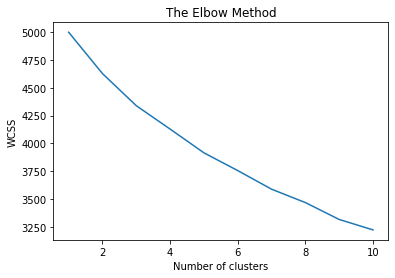

In [112]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(s_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
! pip install kneed

In [113]:
from kneed import DataGenerator, KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

kl.elbow

5

In [114]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(s_features)

In [115]:
sustancias['cluster'] = y_kmeans

In [116]:
sustancias.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,cluster
0,517,24.7,48.5,2449.5,133.0,5044.5,1.2,2.2,3.8,568.8,19.9,3
1,226,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7,0
2,615,18.2,56.8,2055.4,150.3,4718.8,0.8,2.4,4.6,431.6,23.5,2
3,390,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9,0
4,172,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7,0


Just using mean function by cluster, we obtained an idea of where the correct cluster.

In [117]:
sustancias.groupby('cluster').agg({
    'id':'count',
    'v1':np.mean,
    'v2':np.mean,
    'v3':np.mean,
    'v4':np.mean,
    'v5':np.mean,
    'v6':np.mean,
    'v7':np.mean,
    'v8':np.mean,
    'v9':np.mean,
    'v10':np.mean
})

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
cluster,,,,,,,,,,,
0,321,21.147975,56.045171,2146.251402,162.938941,4533.062928,0.997196,2.089720,3.780685,538.435826,23.683489
1,41,22.746341,60.975610,1932.431707,169.265854,4179.736585,0.973171,1.975610,3.812195,534.160976,25.285366
2,44,20.188636,51.381818,1994.804545,172.927273,4715.268182,0.950000,1.940909,3.825000,486.906818,21.902273
3,44,20.465909,52.547727,2235.259091,170.268182,4938.050000,0.988636,2.302273,3.825000,580.618182,21.561364
4,50,19.580000,57.886000,2143.754000,165.434000,4344.014000,1.110000,2.306000,3.866000,553.860000,25.740000


In [118]:
veneno.head()

,caracteristica,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
0,valor,21,56,2131.4,164.6,4527.9,1,2.09,3.8,538,23.7


Focused in this cohort, just to calculate the distance from poison array

In [176]:
k = sustancias[sustancias['cluster']==0]
k.reset_index()
k.index = np.arange(1, len(k)+1)
k.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,cluster
1,226,21.0,56.2,2114.7,163.7,4559.6,1.0,2.1,3.8,542.8,23.7,0
2,390,20.8,56.0,2112.9,165.9,4503.9,1.0,2.1,3.8,533.9,23.9,0
3,172,21.0,56.4,2146.7,166.0,4492.2,1.0,2.1,3.8,543.2,23.7,0
4,225,20.8,56.5,2126.7,164.1,4486.6,1.0,2.1,3.8,534.0,23.9,0
5,822,19.6,51.6,2283.4,153.9,5066.1,0.9,2.2,4.0,486.3,23.8,0


In [171]:
from scipy.spatial import distance_matrix

distance = distance_matrix(k[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10']], veneno[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10']])
distance = pd.DataFrame(distance, columns=['distance'])

321

In [177]:
distance.index = np.arange(1, len(distance)+1)
distance.head()

,distance
1,36.161721
2,30.607680
3,39.214029
4,41.765537
5,561.757966


In [178]:
k = pd.merge(k, distance, right_index=True, left_index=True)

In [179]:
len(k)

321

In [183]:
# distance_matrix([[21.2,	56.2,	2131.8,	164.3,	4526.1,	1.0,	2.1,	3.8,	535.9,	23.6]],[[21,56,2131.4,	164.6,	4527.9,	1,	2.09,	3.8,	538,	23.7]])

array([[2.82667649]])

In [182]:
k.sort_values(['distance']).head(50)

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,cluster,distance
230,374,21.2,56.2,2131.8,164.3,4526.1,1.0,2.1,3.8,535.9,23.6,0,2.826676
182,135,20.9,56.4,2130.9,163.1,4524.8,1.0,2.1,3.8,536.8,23.8,0,3.705415
181,320,21.2,55.6,2133.3,164.2,4526.8,1.0,2.1,3.8,541.8,23.8,0,4.430587
100,417,20.9,56.5,2131.6,163.9,4528.8,1.0,2.1,3.8,533.2,23.8,0,4.964887
175,265,20.9,55.9,2128.1,166.1,4527.9,1.0,2.1,3.8,541.9,23.8,0,5.327298
180,84,21.0,56.3,2130.2,165.4,4524.3,1.0,2.1,3.8,534.3,23.8,0,5.369367
74,96,21.1,55.7,2135.8,165.9,4527.5,1.0,2.1,3.8,534.1,23.9,0,6.046495
13,123,21.1,55.6,2127.9,163.5,4523.3,1.0,2.1,3.8,540.3,23.7,0,6.330885
128,104,20.8,55.9,2128.6,164.6,4523.1,1.0,2.1,3.8,534.6,23.9,0,6.521511
83,287,20.9,55.8,2126.6,164.5,4532.3,1.0,2.1,3.8,539.2,23.6,0,6.626470


In [184]:
k.columns

Index(['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'cluster', 'distance'],
      dtype='object')

In [186]:
sorting_values = k.sort_values(['distance']).head(50)
sorting_values[['id', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10']].to_csv('urgente_orden_de_cierre.csv')